In [28]:
!pip install -q legendgram palettable mapclassify

In [6]:
!wget https://github.com/Gustavoohs/Dados/raw/refs/heads/master/Dados/Vector/MT_indices.zip
!unzip MT_indices.zip

--2025-01-23 12:56:32--  https://github.com/Gustavoohs/Dados/raw/refs/heads/master/Dados/Vector/MT_indices.zip
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/Gustavoohs/Dados/refs/heads/master/Dados/Vector/MT_indices.zip [following]
--2025-01-23 12:56:32--  https://media.githubusercontent.com/media/Gustavoohs/Dados/refs/heads/master/Dados/Vector/MT_indices.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3821621 (3.6M) [application/zip]
Saving to: ‘MT_indices.zip’

MT_indices.zip      100%[===================>]   3.64M  --.-KB/s    in 0.06s   

2025-01-23 12:56:32 (56.5 MB/s)

In [29]:
# Bibliotecas
import geopandas as gpd
from legendgram import legendgram
import matplotlib.pyplot as plt
import numpy as np
import palettable.matplotlib as mplpal
from mapclassify import NaturalBreaks

In [13]:
# Leitura do arquivo vetorial
gdf = gpd.read_file('MT_indices.shp')

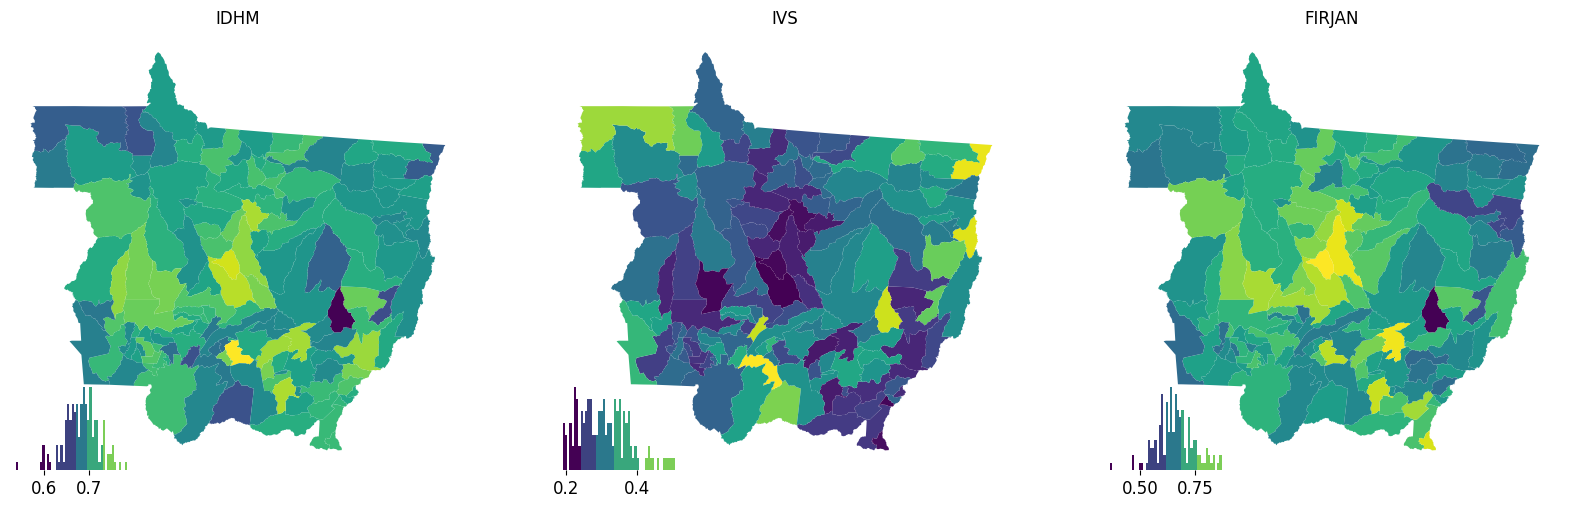

In [37]:
# Visualização
colunas = ['IDHM', 'IVS', 'FIRJAN']

fig, axes = plt.subplots(1, 3, figsize=(20, 15))

for i, coluna in enumerate(colunas):
    ax = gdf.plot(column=coluna, ax=axes[i])
    ax.axis("off")
    classifier = NaturalBreaks(gdf[coluna][~np.isnan(gdf[coluna])], k=5)
    bins = classifier.bins
    legendgram(plt.gcf(), ax, gdf[coluna], breaks = bins,
               pal = mplpal.Viridis_5, loc = 'lower left')
    axes[i].set_title(coluna)

plt.show()